you will implement one-vs-all logistic regression

In [1]:
%matplotlib inline

from numpy import array, arange, cos, exp, pi, zeros, column_stack, ones, newaxis, log, dot, append, zeros_like
from numpy.random import permutation, shuffle
from scipy.io import loadmat
from scipy.optimize import minimize, fmin_bfgs

from matplotlib import pyplot as plt
from matplotlib.figure import Figure
# np.random.permutation has two differences from np.random.shuffle:
# if passed an array, it will return a shuffled copy of the array; np.random.shuffle shuffles the array inplace
# if passed an integer, it will return a shuffled range i.e. np.random.shuffle(np.arange(n))


In [2]:
# ex3data1.mat that contains 5000 training examples of handwritten digits.
# This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)
handwritten_digits = loadmat('ex3data1.mat')
handwritten_digits.keys()

['y', 'X', '__version__', '__header__', '__globals__']

In [3]:
features = handwritten_digits['X']
X = column_stack((ones((features.shape[0],1)), features))
y = handwritten_digits['y']
X.shape, y.shape

((5000, 401), (5000, 1))

In [4]:
y[y==10] = 0
y = y.ravel()
X[y==0].shape

(500, 401)

In [5]:
input_layer_size  = 400  # 20x20 Input Images of Digits
num_labels = 10          # 10 labels, from 0 to 9 

In [6]:
m, n = features.shape

In [7]:
# Randomly select 100 data points to display
#rand_indices = randperm(m);
sel = permutation(X)[:100,:]
sel.shape

(100, 401)

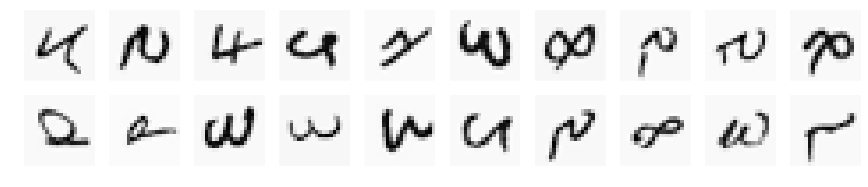

In [8]:
fig = plt.figure(figsize=(15,15))
for i in range(20):
    sp = fig.add_subplot(10,10,i+1)
    #sp.set_title(dataset[i][1])
    plt.axis('off')
    image = sel[i][1:].reshape(20,20)
    plt.imshow(image,interpolation='none',cmap='Greys')
    
plt.show()

In [9]:
def sigmoid(z): 
    return 1/(1+exp(-z))

def lrCostFunction(theta, X, y, rp_lambda):
    m, n = X.shape
    h = sigmoid(X.dot(theta[:, newaxis]))
    
    # J = (1/m)   *   sum(-y .* log(A)- (1-y) .* log(1-A)  )  +   (lambda/(2*m)) * sum(theta(2:end) .^ 2);
    J = sum(-y[:, newaxis] * log(h) - 
                  (1-y[:, newaxis])*log(1-h))/m + (rp_lambda/(2*m)) * theta[1:].T.dot(theta[1:])
    return J

def gradientReg(theta, X, y, rp_lambda):
    m, n = X.shape                
    # grr =   (1/m) * (  (sigmoid(X * theta) - y)' *  X );
    # grad =  grr' +   ((lambda/m) * [0; theta(2:end)]);
    h = sigmoid(dot(X, theta[:,newaxis]))
    theta_temp = theta.copy()
    theta_temp[0]=0
    p1 = dot(X.T,h-y[:, newaxis])/m
    regularization_term = (rp_lambda/m) * theta_temp[:,newaxis]
    grad = p1 + regularization_term
    return grad.flatten()

In [10]:
def oneVsAll(X, y, num_classes, rp_lambda):
    m, n = X.shape
    
    #all_theta = zeros((num_classes, n))
    initial_theta = zeros((n))
    for label in arange(num_classes):
        y_tmp = zeros_like(y)
        y_tmp[y==label] = 1
        res = minimize(fun=lrCostFunction, x0 =initial_theta, args=(X,y_tmp, rp_lambda), method='BFGS', jac=gradientReg)
        if label == 0:
            all_theta = res.x[:, newaxis].copy()
        else:
            all_theta = append(all_theta, res.x[:, newaxis], axis=1)
        print 'Digit "',label, '" Done'
    else:
        return all_theta
    

In [11]:
__lambda__ = 0.01
num_labels = 10
thetas = oneVsAll(X, y, num_labels, __lambda__);
initial_theta = zeros((n,1))
thetas.shape

Digit " 0 " Done
Digit " 1 " Done
Digit " 2 " Done
Digit " 3 " Done
Digit " 4 " Done
Digit " 5 " Done
Digit " 6 " Done
Digit " 7 " Done
Digit " 8 " Done
Digit " 9 " Done


(401, 10)

In [12]:
def predictOneVsAll(all_theta, X):
    pred = X.dot(all_theta)
    return  pred.argmax(axis=1)

prediction = predictOneVsAll(thetas, X)
prediction

array([0, 0, 0, ..., 9, 9, 0])

In [13]:
i = 3999
y[i], prediction[i]

(7, 7)

In [14]:
B = zeros_like(y)

B[prediction==y]=1
Acc = 100* B.sum()/B.size
Acc

61.479999999999997

Scikit-learn Library
==

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logreg = linear_model.LogisticRegression(C=1e5)

NameError: name 'linear_model' is not defined

In [ ]:
y = y.ravel()
logreg.fit(features, y).score(features, y)

In [ ]:
p = logreg.predict(features)
B = zeros_like(y)
B[p==y]=1
Acc = 100* B.sum()/B.size
Acc

Another Way using Scikit-learn
==

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
OneVsRestClassifier(LogisticRegression(penalty='l1')).fit(features, y).score(features, y)

In [ ]:
OneVsRestClassifier(LogisticRegression(penalty='l2')).fit(features, y).score(features, y)

In [ ]:
OneVsRestClassifier(LogisticRegression(C=1e5)).fit(features, y).score(features, y)

In [ ]:
OneVsRestClassifier(LogisticRegression(C=10)).fit(features, y).score(features, y)